# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [1]:
#Your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
#Your code here - Manipulate column names
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [6]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')]

In [7]:
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [8]:
df.columns = [col_formatting(col) for col in df.columns]

In [9]:
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [10]:
#Your code here - Define the target and predictors
#Defining the problem
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [11]:
train, test = train_test_split(df)

In [12]:
#Your code here - Fit the actual model
#Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     527.6
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:44:16   Log-Likelihood:                -40570.
No. Observations:                8152   AIC:                         8.133e+04
Df Residuals:                    8057   BIC:                         8.199e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.4684      1.883     34.246      0.000      60.778      68.159
piece_count                                         76.8195      0.906     84.834      0.000      75.044      78.595
num_reviews                                          6.4428      0.676      9.531      0.000       5.118       7.768
play_star_rating                                     5.7909      0.633      9.149      0.000       4.550       7.032
star_rating                                         -1.7077      0.714     -2.392      0.017      -3.107      -0.308
val_star_rating                                     -8.6273      0.640    -13.480      0.000      -9.882      -7.373
ages_10plus                                        123.5724      6.703     18.434      0.000     110.432     136.713
ages_10_14                                         -20.3969      9.010     -2.264      0.024     -38.059      -2.735
ages_10_16                                         -10.5361      4.106     -2.566      0.010     -18.585      -2.487
ages_10_21                                          54.1180      7.407      7.306      0.000      39.598      68.638
ages_11_16                                         -22.7231      5.856     -3.881      0.000     -34.202     -11.245
ages_12plus                                         67.8617      5.667     11.975      0.000      56.753      78.971
ages_12_16                                         -63.9507      7.037     -9.088      0.000     -77.745     -50.156
ages_14plus                                         25.3155      4.189      6.043      0.000      17.104      33.527
ages_16plus                                         22.5006      6.171      3.646      0.000      10.403      34.598
ages_1half_3                                        -8.7972      2.411     -3.648      0.000     -13.524      -4.070
ages_1half_5                                        -4.1168      3.026     -1.361      0.174     -10.048       1.814
ages_2_5                                            15.4613      1.691      9.145      0.000      12.147      18.775
ages_4plus                                         -17.9950      6.710     -2.682      0.007     -31.148      -4.842
ages_4_7                                            -5.1848      3.466     -1.496      0.135     -11.979       1.610
ages_4_99                                           -2.6267      3.805     -0.690      0.490     -10.085       4.832
ages_5plus                                          -8.8344      3.145     -2.809      0.005     -14.999      -2.670
ages_5_12                                          -31.8943      3.259     -9.786      0.000     -38.283     -25.506
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [13]:
#Your code here - Remove features which do not appear to be statistically relevant
#Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|']<0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 72
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.4684,1.883,34.246,0.000,60.778,68.159
piece_count,76.8195,0.906,84.834,0.000,75.044,78.595
num_reviews,6.4428,0.676,9.531,0.000,5.118,7.768
play_star_rating,5.7909,0.633,9.149,0.000,4.550,7.032
star_rating,-1.7077,0.714,-2.392,0.017,-3.107,-0.308


In [14]:
#Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     698.6
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:45:31   Log-Likelihood:                -40579.
No. Observations:                8152   AIC:                         8.130e+04
Df Residuals:                    8080   BIC:                         8.181e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.3419      1.604     40.126      0.000      61.199      67.485
piece_count                                         77.0943      0.885     87.146      0.000      75.360      78.828
num_reviews                                          6.4135      0.667      9.617      0.000       5.106       7.721
play_star_rating                                     5.8107      0.616      9.426      0.000       4.602       7.019
star_rating                                         -1.6639      0.698     -2.382      0.017      -3.033      -0.295
val_star_rating                                     -8.4885      0.607    -13.993      0.000      -9.678      -7.299
ages_10plus                                        117.5615      4.835     24.316      0.000     108.084     127.039
ages_10_14                                         -17.0704      9.315     -1.833      0.067     -35.331       1.190
ages_10_16                                          -7.6763      3.890     -1.974      0.048     -15.301      -0.052
ages_10_21                                          45.2083      3.233     13.982      0.000      38.870      51.547
ages_11_16                                         -20.2869      5.642     -3.596      0.000     -31.346      -9.228
ages_12plus                                         67.3286      6.143     10.960      0.000      55.286      79.371
ages_12_16                                         -61.2834      7.349     -8.339      0.000     -75.689     -46.878
ages_14plus                                         27.9308      4.768      5.858      0.000      18.585      37.277
ages_16plus                                         23.8921      6.896      3.465      0.001      10.375      37.410
ages_1half_3                                        -2.6455      3.094     -0.855      0.393      -8.711       3.420
ages_2_5                                            21.4143      1.998     10.720      0.000      17.499      25.330
ages_4plus                                         -15.9312     10.253     -1.554      0.120     -36.030       4.167
ages_5plus                                          -7.5198      3.065     -2.454      0.014     -13.527      -1.512
ages_5_12                                          -27.8022      2.697    -10.310      0.000     -33.088     -22.516
ages_6plus                                         -20.5869      5.568     -3.697      0.000     -31.502      -9.671
ages_6_12                                          -15.7889      1.923     -8.212      0.000     -19.558     -12.020
ages_7_12                                          -14.8047      2.237     -6.619      0.000     -19.189     -10.420
ages_7_14                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [15]:
#Your code here - Continue to refine the model
#Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|']<0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

73 62
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.3419,1.604,40.126,0.000,61.199,67.485
piece_count,77.0943,0.885,87.146,0.000,75.360,78.828
num_reviews,6.4135,0.667,9.617,0.000,5.106,7.721
play_star_rating,5.8107,0.616,9.426,0.000,4.602,7.019
star_rating,-1.6639,0.698,-2.382,0.017,-3.033,-0.295


In [16]:
#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     812.0
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:46:22   Log-Likelihood:                -40589.
No. Observations:                8152   AIC:                         8.130e+04
Df Residuals:                    8090   BIC:                         8.174e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.0041      1.380     47.088      0.000      62.298      67.710
piece_count                                         77.1825      0.884     87.324      0.000      75.450      78.915
num_reviews                                          6.1657      0.633      9.733      0.000       4.924       7.407
play_star_rating                                     5.9443      0.614      9.677      0.000       4.740       7.148
star_rating                                         -1.7149      0.696     -2.464      0.014      -3.079      -0.350
val_star_rating                                     -8.5460      0.605    -14.121      0.000      -9.732      -7.360
ages_10plus                                        118.7073      4.780     24.836      0.000     109.338     128.077
ages_10_16                                          -6.3529      3.823     -1.662      0.097     -13.848       1.142
ages_10_21                                          45.8393      3.174     14.442      0.000      39.617      52.061
ages_11_16                                         -19.3547      5.603     -3.455      0.001     -30.337      -8.372
ages_12plus                                         68.8317      6.112     11.261      0.000      56.850      80.813
ages_12_16                                         -59.6514      7.315     -8.154      0.000     -73.991     -45.311
ages_14plus                                         30.6510      4.676      6.555      0.000      21.486      39.816
ages_16plus                                         26.3732      6.834      3.859      0.000      12.976      39.770
ages_2_5                                            22.1883      1.894     11.714      0.000      18.475      25.901
ages_5plus                                          -7.1105      3.050     -2.331      0.020     -13.089      -1.132
ages_5_12                                          -26.3216      2.599    -10.126      0.000     -31.417     -21.226
ages_6plus                                         -19.4550      5.532     -3.517      0.000     -30.300      -8.610
ages_6_12                                          -14.2712      1.784     -8.000      0.000     -17.768     -10.774
ages_7_12                                          -13.8193      2.136     -6.470      0.000     -18.006      -9.633
ages_7_14                                          -10.1496      1.889     -5.374      0.000     -13.852      -6.447
ages_8plus                                          10.7577      4.421      2.433      0.015       2.092      19.424
ages_8_12                                          -13.1175      2.690     -4.876      0.000     -18.391      -7.844
ages_8_14                                

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [17]:
#Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.473293987989765),
 ('num_reviews', 2.573004994956602),
 ('play_star_rating', 2.428570119216899),
 ('star_rating', 3.1822970039054472),
 ('val_star_rating', 2.3836391662808993),
 ('ages_10plus', 7.140034394673633),
 ('ages_10_16', 1.1729798137880045),
 ('ages_10_21', 1.051543348673478),
 ('ages_11_16', 1.1565598271565112),
 ('ages_12plus', 6.2425229693283395),
 ('ages_12_16', 1.197866057823145),
 ('ages_14plus', 2.1945079955365805),
 ('ages_16plus', 9.406031903390522),
 ('ages_2_5', 1.1835452730814637),
 ('ages_5plus', inf),
 ('ages_5_12', 3.1721070252850816),
 ('ages_6plus', 2.662904751336566),
 ('ages_6_12', 1.817894175532808),
 ('ages_7_12', 1.4687801769463578),
 ('ages_7_14', 1.8675004995116489),
 ('ages_8plus', 2.581441137913932),
 ('ages_8_12', 1.267058151077804),
 ('ages_8_14', 1.9747677209361783),
 ('ages_9plus', 1.4089287701299893),
 ('ages_9_12', 1.01908619102707),
 ('ages_9_14', 1.8632418798822359),
 ('theme_name_Architecture', 5.253891937287234),
 ('theme_

In [18]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

62 55


In [19]:
#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     817.3
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:47:28   Log-Likelihood:                -40929.
No. Observations:                8152   AIC:                         8.197e+04
Df Residuals:                    8096   BIC:                         8.236e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           67.4828      1.138     59.273      0.000      65.251      69.715
piece_count                                         78.0313      0.701    111.255      0.000      76.656      79.406
num_reviews                                          4.6451      0.618      7.519      0.000       3.434       5.856
play_star_rating                                     7.2011      0.559     12.892      0.000       6.106       8.296
star_rating                                         -2.5163      0.701     -3.590      0.000      -3.890      -1.142
val_star_rating                                     -9.7375      0.626    -15.547      0.000     -10.965      -8.510
ages_10_16                                         -12.7873      3.712     -3.445      0.001     -20.063      -5.512
ages_10_21                                          42.5477      3.243     13.122      0.000      36.192      48.904
ages_11_16                                         -28.1698      5.451     -5.168      0.000     -38.855     -17.484
ages_12_16                                         -69.8719      7.119     -9.815      0.000     -83.826     -55.917
ages_14plus                                         13.4655      3.943      3.415      0.001       5.737      21.194
ages_2_5                                            19.5786      1.832     10.688      0.000      15.988      23.169
ages_5_12                                          -30.1089      2.629    -11.454      0.000     -35.262     -24.956
ages_6plus                                         -23.3636      5.706     -4.095      0.000     -34.548     -12.179
ages_6_12                                          -19.4118      1.686    -11.516      0.000     -22.716     -16.107
ages_7_12                                          -18.1698      2.086     -8.710      0.000     -22.259     -14.081
ages_7_14                                          -14.6435      1.820     -8.048      0.000     -18.210     -11.077
ages_8plus                                          -1.1724      4.491     -0.261      0.794      -9.975       7.630
ages_8_12                                          -17.7629      2.593     -6.850      0.000     -22.846     -12.680
ages_8_14                                          -15.5731      1.906     -8.171      0.000     -19.309     -11.837
ages_9plus                                          14.9848     10.287      1.457      0.145      -5.180      35.149
ages_9_12                                          -28.6890      6.443     -4.453      0.000     -41.319     -16.059
ages_9_14                                          -13.8638      2.564     -5.407      0.000     -18.890      -8.837
theme_name_BOOST                         

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

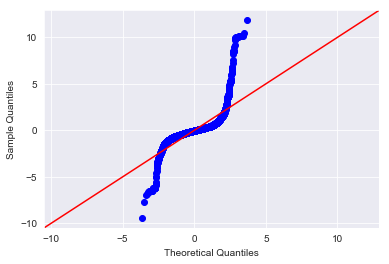

In [20]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

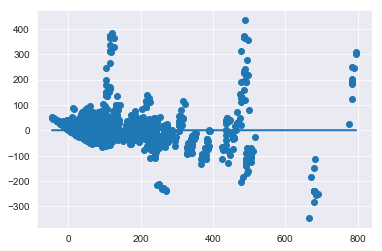

In [21]:
#Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

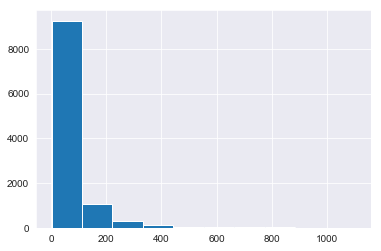

In [22]:
#Your code here - Check for outliers
df.list_price.hist()

In [23]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [25]:
#Your code here - Rerun the model with extreme outliers removed
orig_tot = len(df)
df = df[df.list_price < 450] #Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) #Applying a log transformation
train, test = train_test_split(df)



Percent removed: 0.0


In [26]:
#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     312.8
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:52:26   Log-Likelihood:                 4185.6
No. Observations:                8067   AIC:                            -8259.
Df Residuals:                    8011   BIC:                            -7868.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            1.1665      0.005    257.473      0.000       1.158       1.175
piece_count                                          0.1480      0.003     45.163      0.000       0.142       0.154
num_reviews                                         -0.0115      0.003     -4.572      0.000      -0.016      -0.007
play_star_rating                                     0.0346      0.002     15.766      0.000       0.030       0.039
star_rating                                         -0.0168      0.003     -6.087      0.000      -0.022      -0.011
val_star_rating                                     -0.0338      0.002    -13.708      0.000      -0.039      -0.029
ages_10_16                                           0.1901      0.015     13.061      0.000       0.162       0.219
ages_10_21                                           0.2043      0.013     15.347      0.000       0.178       0.230
ages_11_16                                           0.0876      0.022      3.978      0.000       0.044       0.131
ages_12_16                                          -0.0010      0.027     -0.038      0.969      -0.053       0.051
ages_14plus                                          0.1305      0.017      7.619      0.000       0.097       0.164
ages_2_5                                             0.1646      0.007     22.632      0.000       0.150       0.179
ages_5_12                                           -0.1791      0.010    -17.086      0.000      -0.200      -0.159
ages_6plus                                          -0.2571      0.021    -12.033      0.000      -0.299      -0.215
ages_6_12                                           -0.0076      0.007     -1.156      0.248      -0.020       0.005
ages_7_12                                            0.0695      0.008      8.273      0.000       0.053       0.086
ages_7_14                                            0.0467      0.007      6.568      0.000       0.033       0.061
ages_8plus                                           0.1838      0.017     10.603      0.000       0.150       0.218
ages_8_12                                            0.1168      0.011     11.093      0.000       0.096       0.137
ages_8_14                                            0.1384      0.008     18.342      0.000       0.124       0.153
ages_9plus                                           0.0326      0.038      0.846      0.397      -0.043       0.108
ages_9_12                                            0.1523      0.026      5.930      0.000       0.102       0.203
ages_9_14                                            0.1679      0.010     16.285      0.000       0.148       0.188
theme_name_BOOST                         

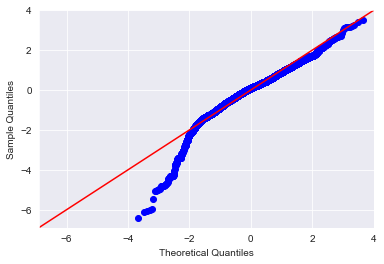

In [27]:
#Your code here - Check normality and homoscedasticity assumptions
# Comment: This is much, much better!
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

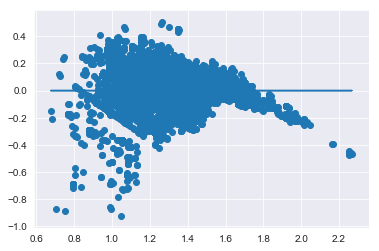

In [28]:
# Comment: There is still a clear underestimate now by the model as the log transformed 
# list price increases, but the model is much improved. Further subsetting is potentially warranted.
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 1.49227541173156
0.81 percentile: 1.5069558190910257
0.82 percentile: 1.513483333496972
0.83 percentile: 1.521863282797854
0.84 percentile: 1.5349112664346138
0.85 percentile: 1.5472538252890415
0.86 percentile: 1.551464219787919
0.87 percentile: 1.565989222412791
0.88 percentile: 1.5694324677239833
0.89 percentile: 1.5740858817153383
0.9 percentile: 1.589080154589561
0.91 percentile: 1.6047697820922169
0.92 percentile: 1.6191946258319374
0.93 percentile: 1.6371351481289014
0.94 percentile: 1.6504684261315878
0.95 percentile: 1.6662460521361453
0.96 percentile: 1.6848704067776854
0.97 percentile: 1.7099984275509366
0.98 percentile: 1.7366588791235438
0.99 percentile: 1.7704246874997098


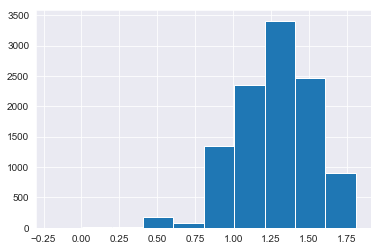

In [29]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

df.list_price.hist()

In [30]:
df = df[df.list_price <= 6]
train, test = train_test_split(df)

#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     306.1
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:53:55   Log-Likelihood:                 4030.3
No. Observations:                8067   AIC:                            -7949.
Df Residuals:                    8011   BIC:                            -7557.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            1.1589      0.005    254.436      0.000       1.150       1.168
piece_count                                          0.1542      0.003     45.476      0.000       0.148       0.161
num_reviews                                         -0.0210      0.003     -8.249      0.000      -0.026      -0.016
play_star_rating                                     0.0362      0.002     15.906      0.000       0.032       0.041
star_rating                                         -0.0221      0.003     -7.830      0.000      -0.028      -0.017
val_star_rating                                     -0.0302      0.002    -12.166      0.000      -0.035      -0.025
ages_10_16                                           0.1970      0.015     13.254      0.000       0.168       0.226
ages_10_21                                           0.2231      0.014     16.166      0.000       0.196       0.250
ages_11_16                                           0.0833      0.023      3.607      0.000       0.038       0.129
ages_12_16                                          -0.0003      0.028     -0.009      0.993      -0.054       0.054
ages_14plus                                          0.1513      0.018      8.567      0.000       0.117       0.186
ages_2_5                                             0.1782      0.007     24.012      0.000       0.164       0.193
ages_5_12                                           -0.1719      0.011    -16.175      0.000      -0.193      -0.151
ages_6plus                                          -0.2562      0.023    -11.109      0.000      -0.301      -0.211
ages_6_12                                           -0.0059      0.007     -0.889      0.374      -0.019       0.007
ages_7_12                                            0.0851      0.008     10.092      0.000       0.069       0.102
ages_7_14                                            0.0536      0.007      7.421      0.000       0.039       0.068
ages_8plus                                           0.1913      0.018     10.812      0.000       0.157       0.226
ages_8_12                                            0.1217      0.011     11.443      0.000       0.101       0.142
ages_8_14                                            0.1468      0.008     19.251      0.000       0.132       0.162
ages_9plus                                           0.0084      0.038      0.222      0.825      -0.066       0.082
ages_9_12                                            0.1640      0.025      6.448      0.000       0.114       0.214
ages_9_14                                            0.1743      0.011     16.431      0.000       0.153       0.195
theme_name_BOOST                         

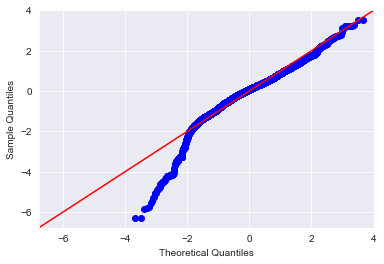

In [31]:
# Check the Normality Assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

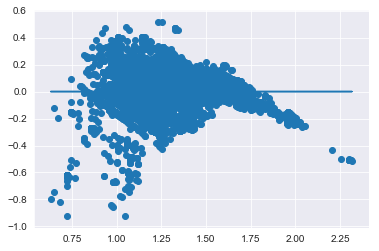

In [32]:
# Comment: No improvement observed
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [33]:
x_cols = ['piece_count', 'country_US']
#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     2710.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:54:43   Log-Likelihood:                 1538.9
No. Observations:                8067   AIC:                            -3072.
Df Residuals:                    8064   BIC:                            -3051.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2832      0.002    556.263      0.000       1.279       1.288
piece_count     0.1893      0.003     73.002      0.000       0.184       0.194
country_US     -0.0718      0.009     -8.002      0.000      -0.089      -0.054
==============================================================================
Omnibus:                     2168.222   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6944.636
Skew:                          -1.362   Prob(JB):                         0.00
Kurtosis:                       6.638   Cond. No.                         4.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

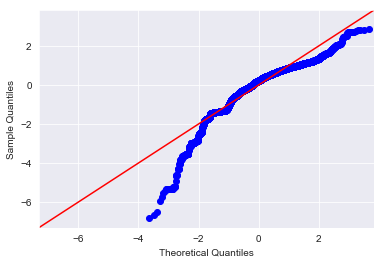

In [34]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

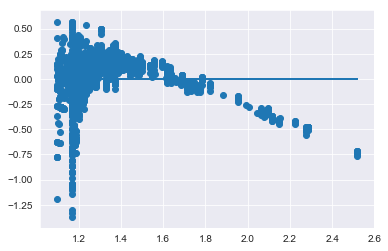

In [35]:
# Comment: Certainly not as strong a model, but with only 2 features, 
# over half the model performance was recovered.
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 